*Ce notebook a été réalisé dans le cadre d'une présentation ppt sur le modèle de Wright-Fisher et ses principales déclinaisons afin de fournir des illustrations et vérifier par simulation la véracité des résultats théoriques exposés.*

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Modèles de Wright-Fisher

Les modèles de Wright-Fisher font partie d'une catégorie de modèles stochastiques visant à étudier l'évolution théorique du _pool_ génétique d'une population au fil des générations. 

Ces modèles ont été conçus dans la lignée de la théorie du biologiste hongrois et grand-père de la génétique __Gregor Mendel__ qui postulait au 19ème siècle le __maintien de la variabilité des génotypes au cours du temps__.

La forme la plus simple de modélisation consiste à étudier deux allèles, soit deux versions d'un même gène, notés A et B.

__Questions__
- Les deux allèles peuvent-ils coexister indéfiniment ou l'un finit-il toujours par disparaître au profit de l'autre ? (On parlera alors de __fixation__ pour l'allèle survivant.)
- Dans le second cas, quelle est la probabilité que l'allèle A se fixe au détriment du B ?
- En moyenne, quel est le temps nécessaire pour que survienne la fixation de l'un des deux allèles ?
- Que se passe-t-il lorsqu'on introduit un phénomène de sélection ou de mutation dans le modèle ?

## Modèle de base

### Hypothèses

Les principales hypothèses du modèle de base sont les suivantes :
* la population est de taille constante finie $M>0$ et possède $N = 2M$ allèles/chromosomes (si diploïdie)  ;
* les générations ne se chevauchent pas : chacune meurt lorsque survient la suivante ;
* au-delà de la génération 0, chaque individu (comprendre: chromosome) reçoit son allèle d'un "parent" choisi uniformément dans la génération précédente.

En notant $X_n$ la variable aléatoire décrivant le nombre d'allèles A présents dans la génération $n$, chaque individu de la génération $n+1$ tire donc avec remise un gène de la génération $n$ ; ce gène a une probabilité $\frac{X_n}{N}$ de présenter l'allèle A.

Le passage d'une génération à la suivante s'apparente donc à la réalisation de $N$ épreuves de Bernoulli avec une probabilité de succès (tirer l'allèle A) égale à la fréquence de cet allèle dans la génération précédente, d'où :

$$L(X_{n+1}| X_n=x_n, ..., X_0=x_0) = L(X_{n+1}|X_n=x_n) = \mathcal{B}(N, \frac{x_n}{N})$$


### Modélisation sous forme de chaîne de Markov

La suite $(X_n)_{n\ge0}$ est donc une chaîne de Markov d'espace d'états $E=\{0,1,...,N\}$ et de matrice de transition $P$ donnée pour tous $x,y \in E$ par :

$$P_{x, y} = P(X_{n+1}=y|X_n=x) = \binom{N}{y}(\frac{x}{N})^y(1-\frac{x}{N})^{N-y})$$

Les états $\{0, N\}$ sont absorbants, autrement dit il n'est plus possible de changer d'état lorsque la suite atteint $0$ (fixation de B) ou $N$ (fixation de A). Les autres états sont transients et mènent donc inexorablement à $0$ ou $N$.

Le temps de fixation est défini par :

$$T = \textrm{inf}\{n\ge0 \textrm{ tel que } X_n \in \{0,N\}\}$$

L'espace d'états étant fini, on sait que $P(T<\infty)=1$ et que $E(T)<\infty$, ce qui signifie que la fixation de l'un des allèles survient presque sûrement après un nombre fini (quoique possiblement grand) de générations.

__Illustration de la fixation presque sûre pour différentes tailles de population et proportions initiales de A__

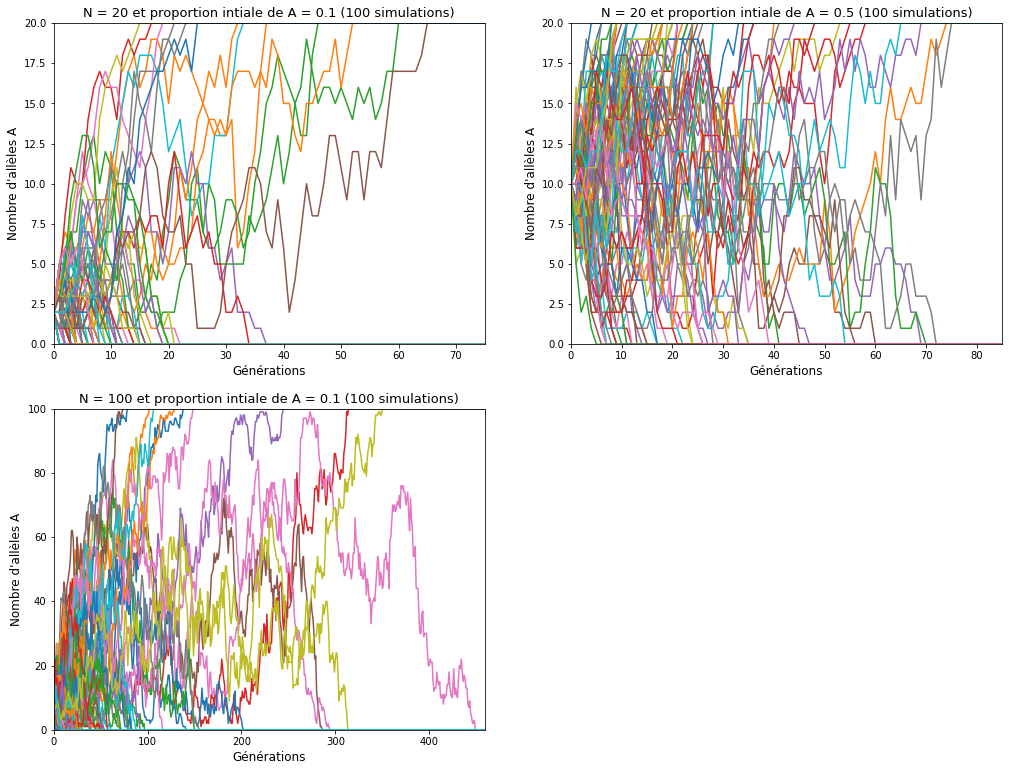

In [79]:
# Taille de la population (fixe)
liste_N = [20, 20, 100]
# Effectif de l'allèle A à la génération 0
liste_propA = [1/10, 1/2, 1/10]
# Nombre de chaînes simulées (100 pour une bonne visualisation, 1000+ pour de bonnes approximations)
simulations = 100
# Nombre de générations
generations = 800

plt.figure(figsize=(17,13))
for k in range(3):
    plt.subplot(2, 2, k+1)
    N = liste_N[k]
    X0 = int(N * liste_propA[k])
    gen_max = 0
    for i in range(simulations):
        # Liste des états de la chaînes en cours
        X = [X0]
        for j in range(generations):
            # L'état X_{n+1} est déterminé par la loi binomiale de paramètres N et X_{n-1}/N
            X_i = np.random.binomial(N, X[j]/N)
            X.append(X_i)
            if X_i in [0,N] and X[j] != X_i:
                gen_max = max(gen_max, j+1)
        plt.plot(X)
        plt.xlabel('Générations', fontsize=12)
        plt.ylabel('Nombre d\'allèles A', fontsize=12)
        plt.xlim(left=0, right=gen_max+10)
        plt.ylim(bottom=0, top=N)
        plt.title(f'N = {N} et proportion intiale de A = {liste_propA[k]} ({simulations} simulations)', fontsize=13)
plt.show()

Deux remarques :
- les chances de fixation de A semblent dépendre de la proportion initiale de A (logique puisque le chemin à parcourir pour atteindre $0$ ou $N$ est plus ou moins long en fonction du point de départ) ;
- le nombre moyen de générations nécessaires pour que survienne l'absorption semble également dépendre de cette proportion initiale mais aussi et surtout de la taille de la population.

### Probabilité et temps moyen de fixation

La probabilité que l'allèle A se fixe avant l'allèle B (donc que la chaîne atteigne $N$ avant $0$) est égale à la proportion de l'allèle A dans la population de départ :

$$P(X_T = N|X_0=x_0) = \frac{x_0}{N}$$

La vitesse moyenne de fixation est quant à elle donnée par l'unique solution d'un système d'équations linéaires pour laquelle on dispose de l'approximation suivante pour $N$ grand, en notant $p\in[0,1]$ la proportion de A dans la population initiale :

$$E(T|X_0=Np) \sim -2N(p\log{(p)}+(1-p)\log{(1-p})$$

On constate que le temps moyen de fixation est proportionnel à la taille $N$ de la population et atteint son maximum pour $p = \frac{x_0}{N} = \frac{1}{2}$.

__Vérifications par simulations__

Le code suivant permet de comparer numériquement les probabilités et les temps moyens de fixation théoriques et simulés en fonction des paramètres rensignés par l'utilisateur.

In [80]:
# Taille de la population (fixe)
N = 100
# Proportion de l'allèle A à la génération 0
p0 = 1/4
# Nombre de chaînes simulées
simulations = 10000
# Nombre de générations (à augmenter avec N)
generations = 2000

# Compteur des chaînes atteignant N (fixation de A)
fix_A = 0
# Liste des premières générations atteignant l'un des deux états absorbants pour chaque chaîne
tps_absorb = []

for i in range(simulations):
    # Liste des états de la chaînes en cours
    X = [int(N*p0)]
    for j in range(generations):
        # L'état X_{n+1} est déterminé par la loi binomiale de paramètres N et X_{n-1}/N
        X_i = np.random.binomial(N, X[j]/N)
        X.append(X_i)
        # Lorsque la chaîne atteint 0 ou N...
        if X[j+1] in [0,N] and X[j] not in [0,N]:
            # ... on incrémente le compteur fix_A de 1 si l'état vaut N
            fix_A += X[j+1]/N
            # ... et on enregistre le nombre de générations jusqu'à absorption
            tps_absorb.append(j+1)
            break

print(f"Pour {simulations} simulations avec p = {p0} et N = {N}")
print("\nProbabilité théorique de fixation de A :", round(p0, 2))
print("Proba estimée de fixation de A :", fix_A/simulations) # Proportion des simulations pour laquelle A s'est fixé
print("\nTemps moyen théorique (approx.):", round(-2*N*(p0*np.log(p0) + (1-p0)*np.log(1-p0)), 2))
print("Temps moyen estimé avant absorption :", round(np.mean(tps_absorb), 2))


Pour 10000 simulations avec p = 0.25 et N = 100

Probabilité théorique de fixation de A : 0.25
Proba estimée de fixation de A : 0.254

Temps moyen théorique (approx.): 112.47
Temps moyen estimé avant absorption : 111.37


Le code qui suit est équivalent au précédent, à la différence qu'au lieu de considérer uniquement le nombre d'individus portant l'allèle A et de modèliser son évolution par une loi binomiale, on va ici représenter la population comme une liste de 0 (individus portant l'allèle B) et de 1 (individus portant l'allèle A) puis modéliser les générations successives en sélectionnant $N$ individus avec remise parmi les $N$ de la génération précédente.

L'intérêt est de montrer en retirant un cran de modélisation que le choix de la binomiale est justifié pour décrire l'évolution en proportion de l'un des allèles.

In [81]:
## Création de la génération 0
# Taille de la population
N = 100
# Proportion de A
p0 = 1/4
# Effectif de A
X0 = int(p0*N)
# Liste de propA 1 et (1-propA) 0
pop = np.concatenate((np.ones(X0), np.zeros(N-X0)))
# Mélange
np.random.shuffle(pop)

In [82]:
fix_A = 0
simulations = 10000
generations = 800
tps_absorb = []
for i in range(simulations):
    X = [X0]
    evol_pop = [pop]
    for j in range(generations):
        # Sélection de N individus avec remise
        evol_pop.append(evol_pop[j][np.random.randint(0, N, N)])
        # Somme des éléments de la liste (0 ou 1) -> nombre de A
        X.append(np.sum(evol_pop[j+1]))
        if X[j+1] in [0,N] and X[j] not in [0,N]:
            fix_A += X[j+1]/N
            tps_absorb.append(j+1)
            break

print(f"Pour {simulations} simulations avec p = {p0} et N = 100")
print("\nProbabilité théorique de fixation de A :", round(p0, 2))
print("Proba estimée de fixation de A :", fix_A/simulations) # Proportion des simulations pour laquelle A s'est fixé
print("\nTemps moyen théorique (approx.):", round(-2*N*(p0*np.log(p0) + (1-p0)*np.log(1-p0)), 2))
print("Temps moyen estimé avant absorption :", round(np.mean(tps_absorb), 2))

Pour 10000 simulations avec p = 0.25 et N = 100

Probabilité théorique de fixation de A : 0.25
Proba estimée de fixation de A : 0.2446

Temps moyen théorique (approx.): 112.47
Temps moyen estimé avant absorption : 111.0


__Comparaison graphique des relations théoriques et estimées__

Le code ci-dessous permet de visualiser les relations qui lient la probabilité de fixation de A et le temps de fixation moyen à la proportion initiale de A dans la population et de les comparer aux relations théoriques exposées plus haut.

In [83]:
N = 100
s = 1/N
simulations = 1000
generations = 800
list_propA = np.linspace(0,1,101)
probFix = []
tempsFix = []
for p in list_propA:
    X0 = int(p*N)
    fix_A = 0
    tps_absorb = []
    for i in range(simulations):
        X = [X0]
        for j in range(generations):
            X_i = np.random.binomial(N, X[j]/N)
            X.append(X_i)
            if X[j] in [0,N]:
                fix_A += X[j]/N
                tps_absorb.append(j)
                break
    probFix.append(fix_A/simulations)
    tempsFix.append(np.mean(tps_absorb))

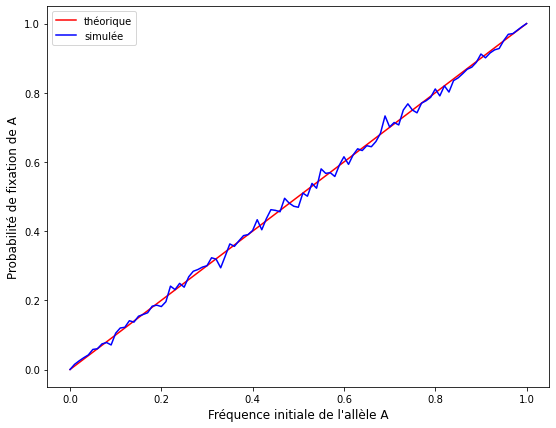

In [84]:
plt.figure(figsize=(9,7))
plt.plot(list_propA, list_propA, label='théorique', color='red')
plt.plot(list_propA, probFix, label='simulée', color='blue')
plt.xlabel("Fréquence initiale de l'allèle A", fontsize=12)
plt.ylabel("Probabilité de fixation de A", fontsize=12)
plt.legend()
#plt.savefig('WF2.png', bbox_inches='tight')
plt.show()

C:\Users\timot\AppData\Local\Temp\ipykernel_38188\2422521284.py:3: RuntimeWarning: divide by zero encountered in log
  f = lambda z: -2*N * (z*np.log(z) + (1-z)*np.log(1-z))
C:\Users\timot\AppData\Local\Temp\ipykernel_38188\2422521284.py:3: RuntimeWarning: invalid value encountered in multiply
  f = lambda z: -2*N * (z*np.log(z) + (1-z)*np.log(1-z))


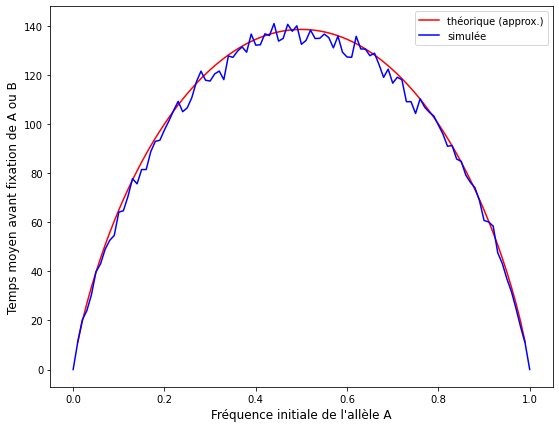

In [85]:
plt.figure(figsize=(9,7))

f = lambda z: -2*N * (z*np.log(z) + (1-z)*np.log(1-z))
plt.plot(list_propA, f(list_propA), label='théorique (approx.)', color='red')
plt.plot(list_propA, tempsFix, label='simulée', color='blue')
plt.xlabel("Fréquence initiale de l'allèle A", fontsize=12)
plt.ylabel("Temps moyen avant fixation de A ou B", fontsize=12)
plt.legend()
#plt.savefig('WF3.png', bbox_inches='tight')
plt.show()


## Wright-Fisher avec sélection

On intègre ici la sélection naturelle en supposant que les allèles A et B apportent des avantages différents à leurs porteurs en termes de viabilité ou de chances de reproduction.

On donne une viabilité $1+s$ à l'allèle A et $1$ à l'allèle B, ce qui implique qu'un individu portant A bénéficie de chances de sélection $1+s$ fois plus élevées qu'un individu portant B.

Tout se passe donc comme si on piochait des allèles dans une urne contenant $(1+s)x_n$ allèles A au lieu de $x_n$ avec un total de $N+sx_n$ allèles, ce qui donne la loi de transition :

$$L(X_{n+1}|X_n=x_n) = \mathcal{B}(N, \frac{x_n(1+s)}{N+sx_n})$$

La probabilité de fixation de A sachant $X_0$ est donnée par :

$$P(X_T=N|X_0=x_0) = \sum_{y=0}^{N}P_{x_0, y}P(X_T=N|X_0=y)$$

Pour $N$ tendant vers l'infini et $s$ petit tel que $Ns\xrightarrow[N \to \infty]{}\alpha>0$, on a un équivalent pratique avec $p \in [0,1]$ :

$$P(X_T=N|X_0=\lfloor pN \rfloor) \xrightarrow[N \to \infty]{} \frac{1-e^{-2 \alpha p}}{1-e^{-2 \alpha}}$$

In [86]:
N = 100
# Paramètre de viabilité de l'allèle
# L'individu portant A a (1+s) fois plus de chances de sélection que s'il portait l'allèle B
s = 1/N
simulations = 1000
generations = 800
list_propA = np.linspace(0,1,101)
probFix = []
tempsFix = []
for p in list_propA:
    X0 = int(p*N)
    fix_A = 0
    tps_absorb = []
    for i in range(simulations):
        X = [X0]
        for j in range(generations):
            # Seule la probabilité de succès (obtenir un A) est dans la loi d'évolution des générations
            X_i = np.random.binomial(N, X[j]*(1+s)/(N+s*X[j]))
            X.append(X_i)
            if X[j] in [0,N]:
                fix_A += X[j]/N
                tps_absorb.append(j)
                break
    probFix.append(fix_A/simulations)
    tempsFix.append(np.mean(tps_absorb))

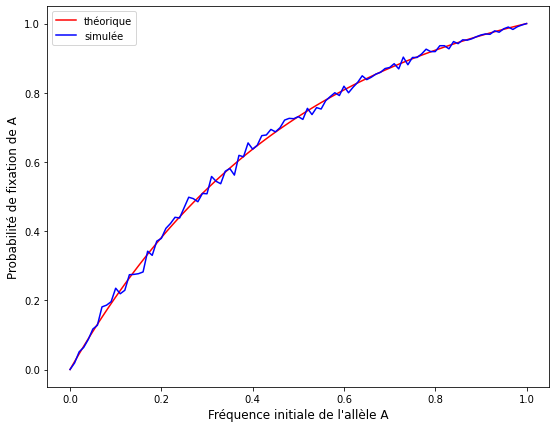

In [87]:
plt.figure(figsize=(9,7))
alpha = N*s
# Fonction donnant la probabilité théorique de fixation
prob = lambda p: (1-np.exp(-2*alpha*p))/(1-np.exp(-2*alpha))
plt.plot(list_propA, prob(list_propA), label='théorique', color='red')
plt.plot(list_propA, probFix, label='simulée', color='blue')
plt.xlabel("Fréquence initiale de l'allèle A", fontsize=12)
plt.ylabel("Probabilité de fixation de A", fontsize=12)
plt.legend()
#plt.savefig('WF4.png', bbox_inches='tight')
plt.show()

Même avec un faible avantage sélectif ($s$ petit), on voit que la probabilité de fixation de A est sensiblement accrue par rapport au modèle de base, toutes choses égales par ailleurs.

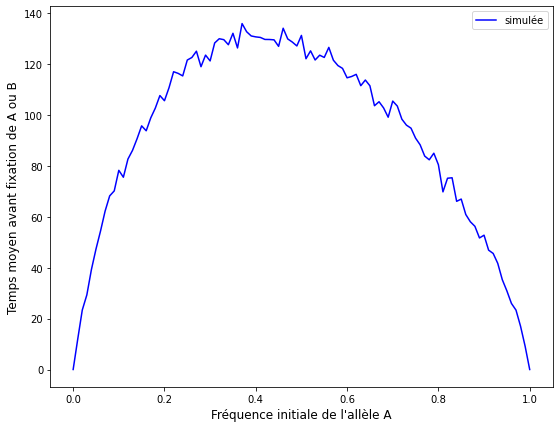

In [88]:
plt.figure(figsize=(9,7))
plt.plot(list_propA, tempsFix, label='simulée', color='blue')
plt.xlabel("Fréquence initiale de l'allèle A", fontsize=12)
plt.ylabel("Temps moyen avant fixation de A ou B", fontsize=12)
plt.legend()
#plt.savefig('WF5.png', bbox_inches='tight')
plt.show()

De même, le temps moyen de fixation n'est plus maximal pour des proportions initiales égales de l'allèle A et de l'allèle B mais pour une proportion de A sensiblement inférieure à celle de B.

## Wright-Fisher avec mutations

Dans cette variante, l'allèle A mute en B d'une génération à l'autre avec une probabilité $u \in [0,1]$ tandis que l'allèle B mute en A avec une probabilité $v \in [0,1]$.

La loi de transition devient :

$$L(X_{n+1}|X_n=x_n) = \mathcal{B}(N, \frac{x_n(1-u) + (N-x_n)v}{N})$$

Plusieurs cas se présentent alors, résumés dans les graphiques ci-dessous :
* Si $u=v=0$, le modèle est équivalent au modèle de base (Fig.1) ;
* Si $0<u\le1$ et $v=0$, l'état $0$ reste absorbant mais l'état $N$ rejoint la classe transitoire (Fig.2);
* Si $u=v=1$, $\{0,N\}$ devient une classe récurrente d'ordre 2 i.e la chaîne est presque sûrement absorbée par $\{0,N\}$ et oscille entre les états $0$ et $N$ une fois que l'un d'eux est atteint (Fig.3) ;
* Si $0<u\le1$ et $0<v<1$ (ou l'inverse), la chaîne devient irréductible (tous les états communiquent), récurrente positive car d'espace d'états fini (le temps de retour dans un état déjà visité est d'espérance finie) et apériodique. On note $\mu$ sa loi invariante (Fig.4).

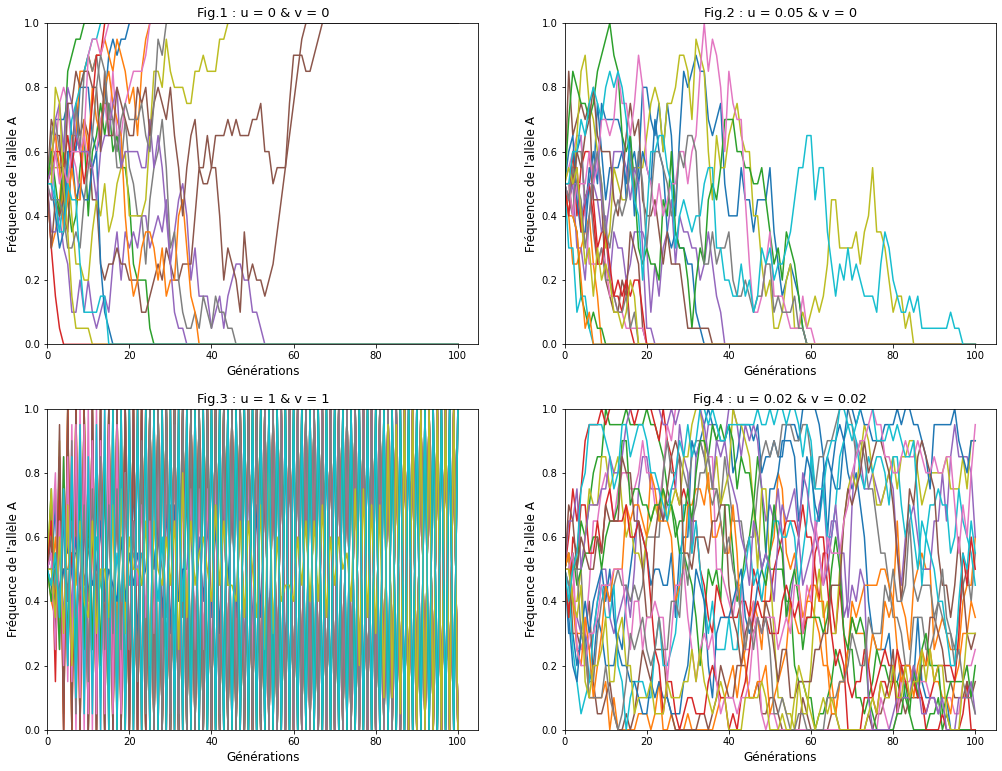

In [89]:
listU = [0, 0.05, 1, 0.02]
listV = [0, 0, 1, 0.02]
N = 20
simulations = 20
generations = 100
X0 = 10


plt.figure(figsize=(17,13))
for k in range(4):
    plt.subplot(2, 2, k+1)
    fix_A = 0
    u = listU[k]
    v = listV[k]
    for i in range(simulations):
        X = [X0]
        Y = [X0/N]
        for j in range(generations):
            X_i = np.random.binomial(N, (X[j]*(1-u) + (N-X[j])*v)/N)
            X.append(X_i)
            Y.append(X_i/N)
        plt.plot(Y)
    plt.xlabel('Générations', fontsize=12)
    plt.ylabel('Fréquence de l\'allèle A', fontsize=12)
    plt.xlim(left=0)
    plt.ylim(bottom=0, top=1)
    plt.title(f"Fig.{k+1} : u = {u} & v = {v}", fontsize=13)
plt.savefig('WF8.png', bbox_inches='tight')
plt.show()

La loi invariante $\mu$ se calcule numériquement mais n'a pas d'expression simple ; on peut tout de même calculer sa moyenne :

$$m=\frac{Nv}{u+v}$$

ainsi qu'une approximation de sa variance :

$$\sigma^2 \sim \frac{N^2uv}{(u+v)^2(2N(u+v)+1)}$$

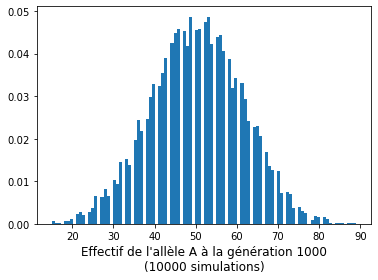

Moyenne empirique : 50.2889
Moyenne théorique : 50.0
Variance empirique : 124.58563679
Approximation théorique de la variance : 119.04761904761902


In [90]:
# Cas où les probabilités de mutation sont identiques
N = 100
X0 = N/2
# Probabilité que A mute en B
u = 0.05
# Probabilité que B mute en A
v = 0.05
simulations = 10000
generations = 1000
result = []

for i in range(simulations):
    X = [X0]
    for j in range(generations):
        X_i = np.random.binomial(N, (X[j]*(1-u) + (N-X[j])*v)/N)
        X.append(X_i)
    result.append(X[-1])

plt.hist(result, bins=100, density=True)
plt.xlabel(f"Effectif de l'allèle A à la génération {generations}\n({simulations} simulations)", fontsize=12)
#plt.savefig('WF6.png', bbox_inches='tight')
plt.show()

print('Moyenne empirique :',np.mean(result))
print('Moyenne théorique :', (N*v)/(u+v))
print('Variance empirique :', np.var(result))
print('Approximation théorique de la variance :', N**2*u*v/((u+v)**2*(2*N*(u+v)+1)))

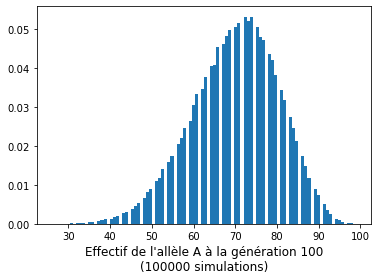

Moyenne empirique : 69.98542
Moyenne théorique : 70.0
Variance empirique : 106.6812074236
Approximation théorique de la variance : 100.0


In [91]:
N = 100
X0 = N/2
# Probabilité que A mute en B
u = 0.03
# Probabilité que B mute en A
v = 0.07
simulations = 100000
generations = 100
result = []

for i in range(simulations):
    X = [X0]
    for j in range(generations):
        X_i = np.random.binomial(N, (X[j]*(1-u) + (N-X[j])*v)/N)
        X.append(X_i)
    result.append(X[-1])

plt.hist(result, bins=100, density=True)
plt.xlabel(f"Effectif de l'allèle A à la génération {generations}\n({simulations} simulations)", fontsize=12)
#plt.savefig('WF7.png', bbox_inches='tight')
plt.show()

print('Moyenne empirique :',np.mean(result))
print('Moyenne théorique :', (N*v)/(u+v))
print('Variance empirique :', np.var(result))
print('Approximation théorique de la variance :', N**2*u*v/((u+v)**2*(2*N*(u+v)+1)))

On constate que des probabilités de mutations non nulles, même faibles et très légèrement différentes, ont un impact conséquent sur l'effectif probable des deux allèles à une génération donnée.